# Read the data

In [2]:
# ----------------------------------------------
# Step 0 - Import Libraries
# ----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


# ----------------------------------------------
# Step 1 - Read the data
# ----------------------------------------------
bikes = pd.read_csv('hour.csv')
display(bikes)

index        date  season  year  month  hour  holiday  weekday  \
0          1  01-01-2011       1     0      1     0        0        6   
1          2  01-01-2011       1     0      1     1        0        6   
2          3  01-01-2011       1     0      1     2        0        6   
3          4  01-01-2011       1     0      1     3        0        6   
4          5  01-01-2011       1     0      1     4        0        6   
...      ...         ...     ...   ...    ...   ...      ...      ...   
17374  17375  31-12-2012       1     1     12    19        0        1   
17375  17376  31-12-2012       1     1     12    20        0        1   
17376  17377  31-12-2012       1     1     12    21        0        1   
17377  17378  31-12-2012       1     1     12    22        0        1   
17378  17379  31-12-2012       1     1     12    23        0        1   

       workingday  weather  temp   atemp  humidity  windspeed  casual  \
0               0        1  0.24  0.2879      0.81     0.0000       3   
1               0        1  0.22  0.2727      0.80     0.0000       8   
2               0        1  0.22  0.2727      0.80     0.0000       5   
3               0        1  0.24  0.2879      0.75     0.0000       3   
4               0        1  0.24  0.2879      0.75     0.0000       0   
...           ...      ...   ...     ...       ...        ...     ...   
17374           1        2  0.26  0.2576      0.60     0.1642      11   
17375           1        2  0.26  0.2576      0.60     0.1642       8   
17376           1        1  0.26  0.2576      0.60     0.1642       7   
17377           1        1  0.26  0.2727      0.56     0.1343      13   
17378           1        1  0.26  0.2727      0.65     0.1343      12   

       registered  demand  
0              13      16  
1              32      40  
2              27      32  
3              10      13  
4               1       1  
...           ...     ...  
17374         108     119  
17375          81      89  
17376          83      90  
17377          48      61  
17378          37      49  

[17379 rows x 17 columns]

# Prelim Analysis and Feature selection

In [7]:
# ----------------------------------------------
# Step 2 - Prelim Analysis and Feature selection
# ----------------------------------------------
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)



In [9]:
null_summers=bikes_prep.isnull().sum()
display(null_summers)



season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

<Figure size 18432x5832 with 0 Axes>

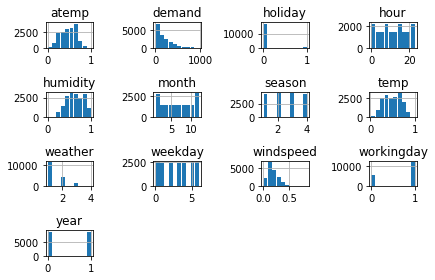

In [30]:
# Create pandas histogram
plt.figure(figsize=(256,81))
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

# Visualise the continuous features Vs demand

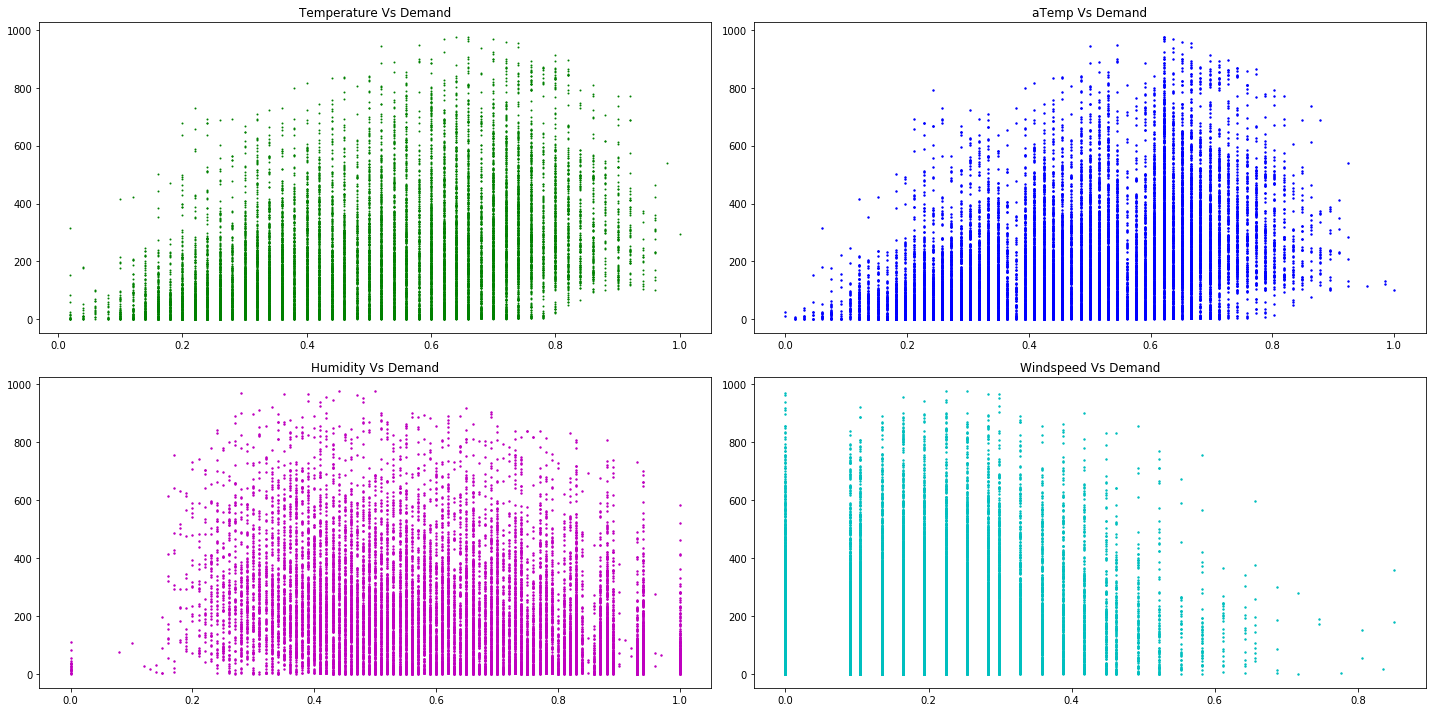

In [31]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=1, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()

# Visualise the categorical features

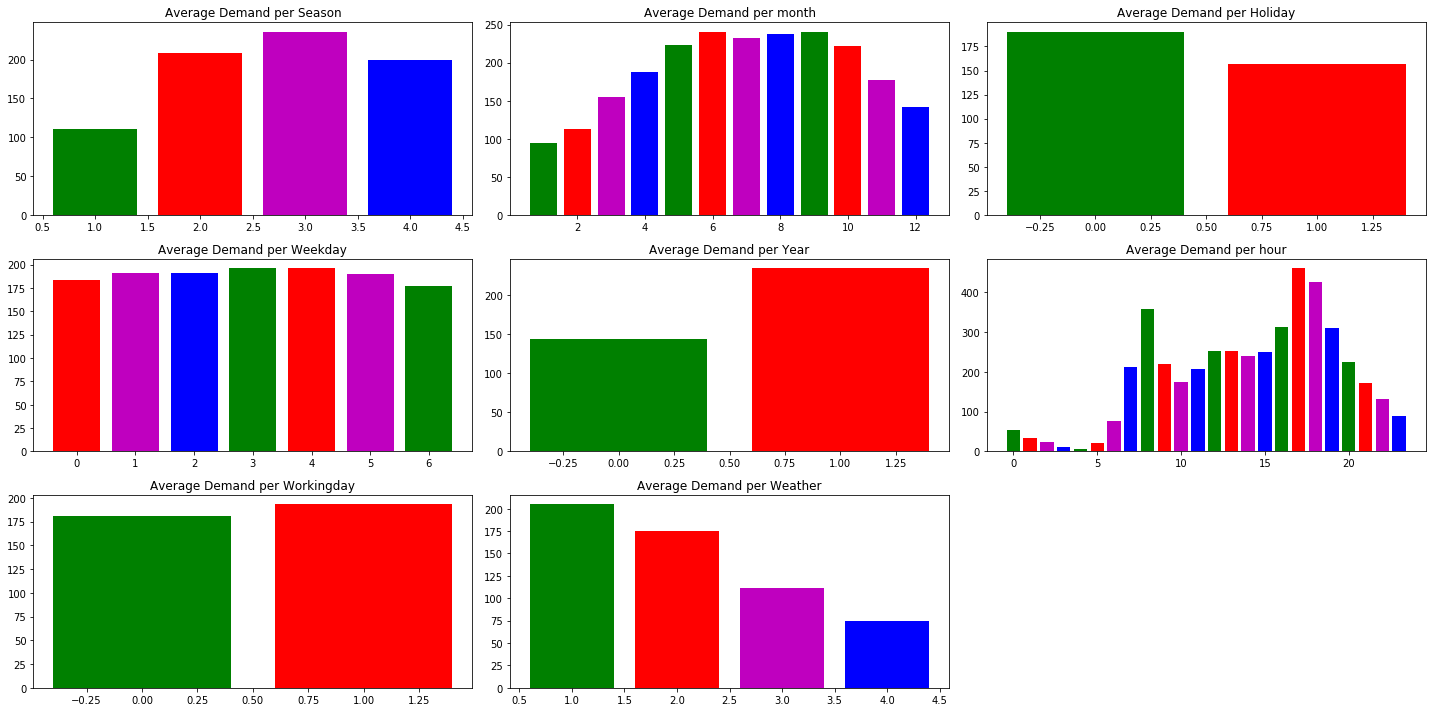

In [28]:
colors = ['g', 'r', 'm', 'b']
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

#plt.subplots_adjust(top=0.85)
plt.tight_layout()